Create an “Academic performance” dataset of students and perform the following operations using 
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or 
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques 
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this 
transformation should be one of the following reasons: to change the scale for better 
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease 
the skewness and convert the distribution into a normal distribution.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('StudentsPerformance1.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [4]:
df.shape

(1000, 8)

In [5]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [6]:
df.describe()

,math score,reading score,writing score
count,996.000000,993.000000,998.00000
mean,65.964859,69.144008,67.90481
std,15.490628,15.198167,15.73355
min,-2.000000,-3.000000,-45.00000
25%,57.000000,59.000000,57.00000
50%,66.000000,70.000000,69.00000
75%,77.000000,80.000000,79.00000
max,102.000000,130.000000,100.00000


from the above code we can analyse that the data has missing values as well as outlier values that can be determined by
count of math score- 996,reading score-993,writing score-998 values out of 1000 values in the dataframe
min  of math score=-2,reading score=-3 and writing score=-45 here the score cannot be below 0, hence outlier values
max  of math score=102,reading score=130 here the score cannot be above 100, hence outlier values

Data cleaning 

In [7]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     4
reading score                  7
writing score                  2
dtype: int64

Fill the missing values with mean values of their respective columns

In [8]:
df['math score'].fillna(df['math score'].mean(),inplace=True)
df['reading score'].fillna(df['reading score'].mean(),inplace=True)
df['writing score'].fillna(df['writing score'].mean(),inplace=True)

In [9]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Missing values are hence managed

  Outlier detection can be done using 
  1.Interquartile range
  2.Box plot
  3.Scatter plot
  4.Z-score

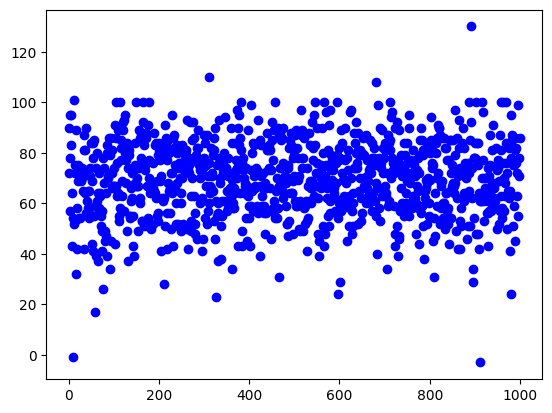

In [10]:
plt.scatter(np.arange(0,1000),df['reading score'],c='b')
plt.show()

In this plot we can see that some values are below 0 and above 100, these are the outlier values

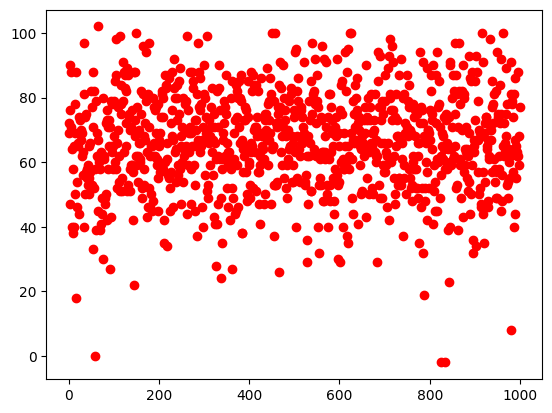

In [11]:
plt.scatter(np.arange(0,1000),df['math score'],c='r')

In this plot we can see that some values are below 0 and above 100, these are the outlier values

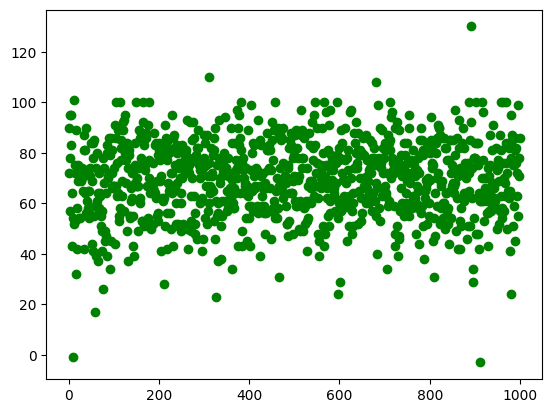

In [12]:
plt.scatter(np.arange(0,1000),df['reading score'],c='g')

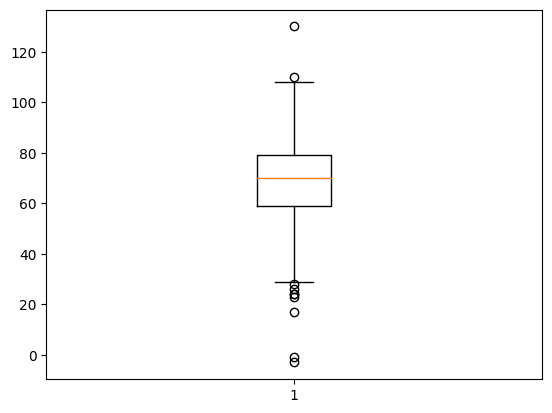

In [13]:
plt.boxplot(df['reading score'])
# plt.boxplot(df['math score'])
plt.show()

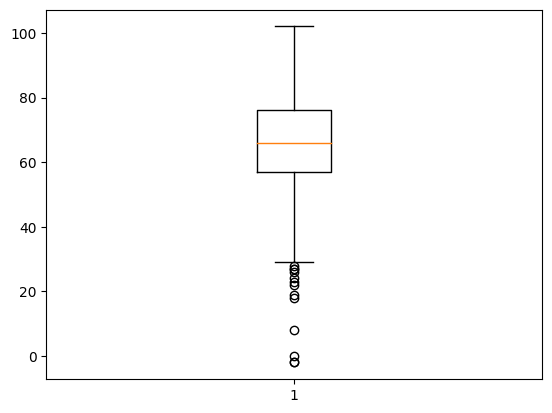

In [14]:
plt.boxplot(df['math score'])
plt.show()

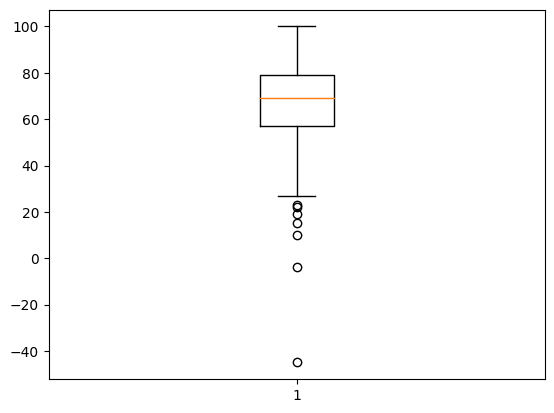

In [15]:
plt.boxplot(df['writing score'])
plt.show()

In [16]:
q1 = np.percentile(df['math score'], 25)
q3 = np.percentile(df['math score'], 75)
iqr = q3 - q1

print(iqr)
# Define a threshold
threshold = 2

# Find outlier indices
outlier_indices_mathscore = np.where((df['math score'] < q1 - threshold * iqr) | (df['math score'] > q3 + threshold * iqr))[0]

print("Outlier indices:", outlier_indices_mathscore)

for i in outlier_indices_mathscore:
    print(df['math score'][i])

19.25
Outlier indices: [ 17  59 824 833 980]
18.0
0.0
-2.0
-2.0
8.0


In [17]:
q1 = np.percentile(df['reading score'], 25)
q3 = np.percentile(df['reading score'], 75)
iqr = q3 - q1

print(iqr)
# Define a threshold
threshold = 2

# Find outlier indices
outlier_indices_readingscore = np.where((df['reading score'] < q1 - threshold * iqr) | (df['reading score'] > q3 + threshold * iqr))[0]

print("Outlier indices:", outlier_indices_readingscore)

for i in outlier_indices_readingscore:
    print(df['reading score'][i])

20.0
Outlier indices: [  9  59 892 911]
-1.0
17.0
130.0
-3.0


In [18]:
q1 = np.percentile(df['writing score'], 25)
q3 = np.percentile(df['writing score'], 75)
iqr = q3 - q1

print(iqr)
# Define a threshold
threshold = 2

# Find outlier indices
outlier_indices_writingscore = np.where((df['writing score'] < q1 - threshold * iqr) | (df['writing score'] > q3 + threshold * iqr))[0]

print("Outlier indices:", outlier_indices_writingscore)

for i in outlier_indices_writingscore:
    print(df['writing score'][i])

22.0
Outlier indices: [ 59 192 414]
10.0
-4.0
-45.0


From the above data we get an idea of outlier values and their indices
as these are marks we will only remove the values that are below 0 and above 100

In [19]:
for i in outlier_indices_mathscore:
    if(df['math score'][i]>100 or df['math score'][i]<0):
        df=df.drop(i)


In [20]:
for i in outlier_indices_readingscore:
    if(df['reading score'][i]>100 or df['reading score'][i]<0):
        df=df.drop(i)

In [21]:
for i in outlier_indices_writingscore:
    if(df['writing score'][i]>100 or df['writing score'][i]<0):
        df=df.drop(i)

In [22]:
q1 = np.percentile(df['math score'], 25)
q3 = np.percentile(df['math score'], 75)
iqr = q3 - q1

print(iqr)
# Define a threshold
threshold = 2

# Find outlier indices
outlier_indices_mathscore = np.where((df['math score'] < q1 - threshold * iqr) | (df['math score'] > q3 + threshold * iqr))[0]

print("Outlier indices:", outlier_indices_mathscore)

for i in outlier_indices_mathscore:
    print(df['math score'][i])

20.0
Outlier indices: [ 58 973]
58.0
49.0


In [23]:
q1 = np.percentile(df['reading score'], 25)
q3 = np.percentile(df['reading score'], 75)
iqr = q3 - q1

print(iqr)
# Define a threshold
threshold = 2

# Find outlier indices
outlier_indices_readingscore = np.where((df['reading score'] < q1 - threshold * iqr) | (df['reading score'] > q3 + threshold * iqr))[0]

print("Outlier indices:", outlier_indices_readingscore)

for i in outlier_indices_readingscore:
    print(df['reading score'][i])

20.0
Outlier indices: [58]
59.0


In [24]:
q1 = np.percentile(df['writing score'], 25)
q3 = np.percentile(df['writing score'], 75)
iqr = q3 - q1

print(iqr)
# Define a threshold
threshold = 2

# Find outlier indices
outlier_indices_writingscore = np.where((df['writing score'] < q1 - threshold * iqr) | (df['writing score'] > q3 + threshold * iqr))[0]

print("Outlier indices:", outlier_indices_writingscore)

for i in outlier_indices_writingscore:
    print(df['writing score'][i])

21.0
Outlier indices: [ 58 593]
58.0
73.0


Hence the outliers and missing values were dropped from the dataframe